# Tasca M1 T01


## Exercici 1


##### A partir dels documents adjunts (estructura i dades), crea una base de dades amb MySQL. Mostra les característiques principals de l'esquema creat i explica les diferents taules i variables que hi ha.

In [48]:
import mysql.connector

mydb = mysql.connector.connect(
  host="10.201.0.131",
  user="localhost",
  password="",
  database="movies"
)

In [3]:
import pandas as pd

La base de dades té cinc taules

In [168]:
cursor = mydb.cursor()

cursor.execute("SHOW TABLES")

for table in cursor:
    print(table)
    
cursor.close()
mydb.commit()

('tb_genre',)
('tb_movie',)
('tb_movie_person',)
('tb_person',)
('tb_role',)


A continuació podeu veure la descripció de cada taula mostrant les seves principals característiques: nom, tipus, null, key, default i extres

In [169]:
cursor = mydb.cursor()
print("Descripció tb_genre")
cursor.execute("DESCRIBE tb_genre")
resvar = cursor.fetchall()
nombrescolumnas = cursor.column_names
print(nombrescolumnas)
for variables in resvar:
    print(variables)
cursor.close()
mydb.commit()

Descripció tb_genre
('Field', 'Type', 'Null', 'Key', 'Default', 'Extra')
('genre_id', 'int(11)', 'NO', 'PRI', None, '')
('genre_name', 'varchar(40)', 'NO', '', None, '')
('created_by_user', 'varchar(10)', 'NO', '', 'OS_SGAD', '')
('created_date', 'date', 'YES', '', None, '')
('updated_date', 'date', 'YES', '', None, '')


Aquesta taula parla dels gèneres de les diferents pel·lícules

In [172]:
cursor = mydb.cursor()
print("Descripció tb_movie")
cursor.execute("DESCRIBE tb_movie")
resvar = cursor.fetchall()
nombrescolumnas = cursor.column_names
print(nombrescolumnas)
for variables in resvar:
    print(variables)
cursor.close()
mydb.commit()

Descripció tb_movie
('Field', 'Type', 'Null', 'Key', 'Default', 'Extra')
('movie_id', 'int(11)', 'NO', 'PRI', None, '')
('movie_title', 'varchar(100)', 'NO', '', None, '')
('movie_date', 'date', 'YES', '', None, '')
('movie_format', 'varchar(50)', 'YES', '', None, '')
('movie_genre_id', 'int(11)', 'YES', 'MUL', None, '')
('created_by_user', 'varchar(10)', 'NO', '', 'OS_SGAD', '')
('created_date', 'date', 'YES', '', None, '')
('updated_date', 'date', 'YES', '', None, '')


Aquesta taula parla de totes les pel·lícules, la variable més important a la majoria de les taules seran els ID

In [173]:
cursor = mydb.cursor()
print("Descripció tb_movie_person")
cursor.execute("DESCRIBE tb_movie_person")
resvar = cursor.fetchall()
nombrescolumnas = cursor.column_names
print(nombrescolumnas)
for variables in resvar:
    print(variables)
cursor.close()
mydb.commit()

Descripció tb_movie_person
('Field', 'Type', 'Null', 'Key', 'Default', 'Extra')
('movie_id', 'int(11)', 'NO', 'MUL', None, '')
('person_id', 'int(11)', 'NO', 'MUL', None, '')
('role_id', 'int(11)', 'NO', 'MUL', None, '')
('movie_award_ind', 'varchar(1)', 'NO', '', None, '')
('created_by_user', 'varchar(10)', 'NO', '', 'OS_SGAD', '')
('created_date', 'date', 'YES', '', None, '')
('updated_date', 'date', 'YES', '', None, '')


Aquesta taula és la que uneix l'información rebuda de les altres, llavors tot el que són id són claus foranies 

In [174]:
cursor = mydb.cursor()
print("Descripció tb_person")
cursor.execute("DESCRIBE tb_person")
resvar = cursor.fetchall()
nombrescolumnas = cursor.column_names
print(nombrescolumnas)
for variables in resvar:
    print(variables)  
cursor.close()
mydb.commit()

Descripció tb_person
('Field', 'Type', 'Null', 'Key', 'Default', 'Extra')
('person_id', 'int(11)', 'NO', 'PRI', None, '')
('person_name', 'char(100)', 'NO', '', None, '')
('person_country', 'varchar(40)', 'YES', '', None, '')
('person_dob', 'date', 'NO', '', None, '')
('person_dod', 'date', 'YES', '', None, '')
('person_parent_id', 'int(11)', 'YES', 'MUL', None, '')
('created_by_user', 'varchar(10)', 'NO', '', 'OS_SGAD', '')
('created_date', 'date', 'YES', '', None, '')
('updated_date', 'date', 'YES', '', None, '')


Aquesta taula parla de persones, primer vaig dubtar si seria més d'actors o directors però és més aviat una recopilació de persones reconegudes del rubre cinematogràfic

In [175]:
cursor = mydb.cursor()
print("Descripció tb_role")
cursor.execute("DESCRIBE tb_role")
resvar = cursor.fetchall()
nombrescolumnas = cursor.column_names
print(nombrescolumnas)
for variables in resvar:
    print(variables)
cursor.close()
mydb.commit()

Descripció tb_role
('Field', 'Type', 'Null', 'Key', 'Default', 'Extra')
('role_id', 'int(11)', 'NO', 'PRI', None, '')
('role_name', 'varchar(60)', 'NO', '', None, '')
('created_by_user', 'varchar(10)', 'NO', '', 'OS_SGAD', '')
('created_date', 'date', 'YES', '', None, '')
('updated_date', 'date', 'YES', '', None, '')


El més important d'aquesta taula serà que ens assenyala a què es refereixen els id a tb_movie_person, realment va ajudarme a saber de en què consistia cruar aquestes taules
________

### Estructura de la base de datos

A continuació l'esquema de relacions entre taules, es presenta una captura del PhpMyAdmin

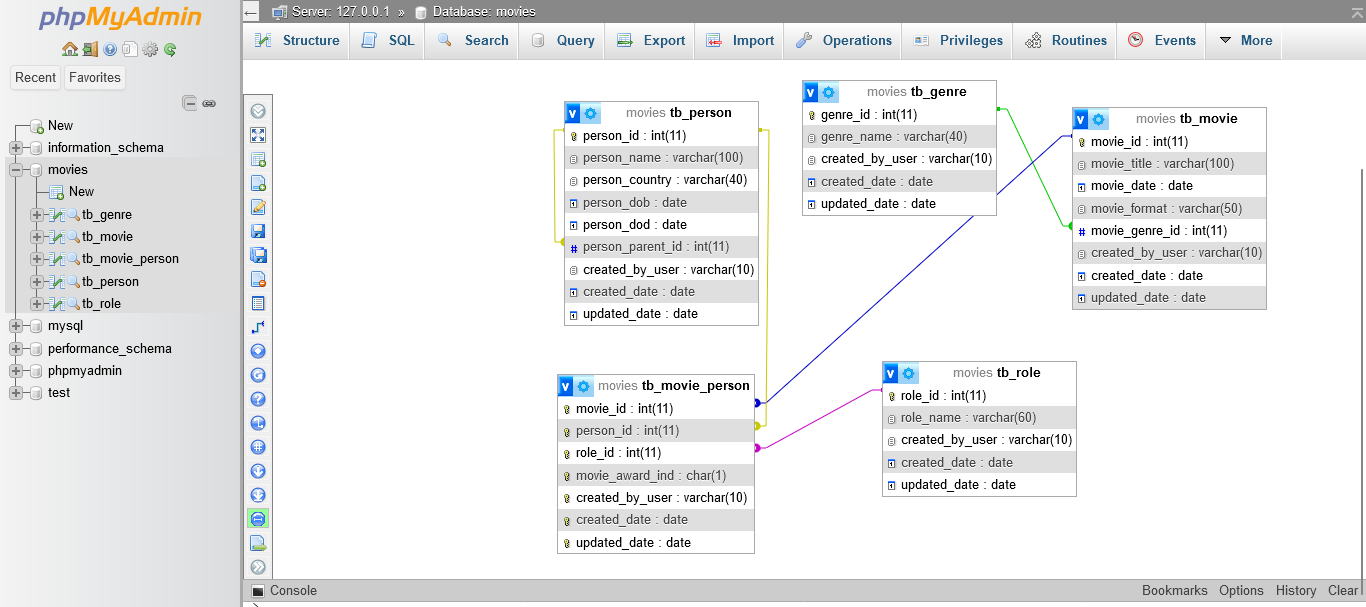

Algo que será importante a tener en cuenta en esta estructura es la gran dependencia entre tablas, de hecho si no se analizan en conjunto pierden el sentido debido a que no sabemos a qué se referirán los ID

## Exercici 2

##### Realitza la següent consulta sobre la base de dades acabada de crear: Has d'obtenir el nom, el país i la data de naixement d'aquelles persones per les quals no consti una data de mort i ordenar les dades de la persona més vella a la persona més jove.

In [49]:
import mysql.connector
from datetime import datetime

mydb = mysql.connector.connect(
  host="10.201.0.131",
  user="localhost",
  password="",
  database="movies"
)

cursor = mydb.cursor()

cursor.execute("""
    SELECT person_name, person_country, person_dob 
    FROM tb_person 
    WHERE person_dod IS NULL ORDER BY person_dob ASC
""")
   
for row in cursor:
    dob = datetime.strftime(row[2], '%d/%m/%Y')
    print(row[0], row[1], dob)

cursor.close()

mydb.commit()

John Williams United States 08/08/1928
Vera Miles United States 23/08/1929
Sean Connery Scotland 08/07/1930
Robert Duvall United States 05/01/1931
Morgan Freeman United States 01/10/1935
Francis Ford Coppola United States 07/04/1939
Gary Kurtz United States 27/07/1940
Martin Sheen United States 03/08/1940
Harrison Ford United States 13/07/1942
George Lucas United States 14/05/1944
Carmine Coppola United States 08/07/1945
Steven Spielberg United States 18/12/1946
Tim Robbins United States 07/06/1949
Mel Gibson Australia 09/08/1950
Tom Hanks United States 09/07/1956
Emilio Martinez Lazaro Spain 09/09/1956
Karra Elejalde Spain 06/03/1960
Emilio Estevez United States 12/05/1962
Ramón Estevez United States 07/08/1963
Carmen Machi Spain 09/08/1964
Charlie Sheen United States 03/09/1965
Reneé Estevez United States 02/04/1967
Catherine Zeta-Jones Wales 25/09/1969
Robert Alamo Spain 06/05/1970
Daniel Sanchez Arevalo Spain 08/06/1970
Quim Gutierrez Spain 27/03/1981
Veronica Echegui Spain 14/03/1

## Exercici 3

##### Realitza la següent consulta sobre la base de dades acabada de crear: Has d'obtenir el nom del gènere i el nombre total de pel·lícules d'aquest gènere i ordenar-ho per ordre descendent de nombre total de pel·lícules.  

In [50]:
import mysql.connector

mydb = mysql.connector.connect(
  host="10.201.0.131",
  user="localhost",
  password="",
  database="movies"
)

cursor = mydb.cursor()

cursor.execute("""

    SELECT tb_genre.genre_name, COUNT(*) 
        FROM tb_movie
    JOIN tb_genre ON tb_movie.movie_genre_id = tb_genre.genre_id
    GROUP BY tb_genre.genre_name
    ORDER BY COUNT(*) DESC;

""")

table = cursor.fetchall()
for resultado in table:
    print(resultado)

cursor.close()

mydb.commit()

('Suspense', 2)
('Comedia', 2)
('Romance', 2)
('Ciencia Ficción', 2)
('Acción', 2)
('Drama', 2)
('Bélico', 1)
('Fantasía', 1)
('Terror', 1)


# Exercici 4

##### Realitza la següent consulta sobre la base de dades acabada de crear: Has d'obtenir, per a cada persona, el seu nom i el nombre màxim de rols diferents que ha tingut en una mateixa pel·lícula. 

In [51]:
import mysql.connector

mydb = mysql.connector.connect(
    host="10.201.0.131",
    user="localhost",
    password="",
    database="movies")

cursor = mydb.cursor()

cursor.execute("""
    SELECT 
        (SELECT tb_person.person_name FROM tb_person WHERE tb_person.person_id = subquery.person_id) AS person_name,
        (SELECT tb_movie.movie_title FROM tb_movie WHERE tb_movie.movie_id = subquery.movie_id) AS movie_title,
        MAX(num_role) AS max_role
    FROM (
        SELECT 
            tb_movie_person.person_id, 
            tb_movie_person.movie_id, 
            COUNT(DISTINCT tb_movie_person.role_id) AS num_role 
        FROM 
            tb_movie_person 
            JOIN tb_movie ON tb_movie_person.movie_id = tb_movie.movie_id
        GROUP BY 
            tb_movie_person.person_id, 
            tb_movie_person.movie_id
    ) AS subquery
    GROUP BY 
        subquery.person_id, 
        subquery.movie_id
""")
for table in cursor:
    print(table)
    
cursor.close()

mydb.commit()

('Francis Ford Coppola', 'Apocalypse Now', 3)
('Carmine Coppola', 'Apocalypse Now', 1)
('George Lucas', 'Star Wars:Episode IV - A New Hope', 1)
('George Lucas', 'Indiana Jones and the Temple of Doom', 1)
('Gary Kurtz', 'Star Wars:Episode IV - A New Hope', 1)
('Steven Spielberg', 'Indiana Jones and the Temple of Doom', 1)
('Steven Spielberg', 'The Terminal', 2)
('Steven Spielberg', 'Jaws', 1)
('Steven Spielberg', 'ET The Extraterrestrial', 1)
('John Williams', 'Indiana Jones and the Temple of Doom', 1)
('Alfred Joseph Hitchcock', 'Psycho', 2)
('Anthony Perkins', 'Psycho', 1)
('Vera Miles', 'Psycho', 1)
('Emilio Martinez Lazaro', 'Ocho Apellidos Vascos', 1)
('Emilio Martinez Lazaro', 'Ocho Apellidos Catalanes', 1)
('Emilio Martinez Lazaro', 'El otro lado de la cama', 1)
('Mel Gibson', 'Braveheart', 1)


##### Posteriorment, mostra únicament aquelles persones que hagin assumit més d'un rol en una mateixa pel·lícula.

In [52]:
import mysql.connector

mydb = mysql.connector.connect(
    host="10.201.0.131",
    user="localhost",
    password="",
    database="movies"
)

cursor = mydb.cursor()

cursor.execute("""

    SELECT 
        tb_person.person_name
    FROM 
        tb_person 
    JOIN (
        SELECT  movie_id, person_id 
        FROM    tb_movie_person 
        GROUP BY movie_id, person_id 
            HAVING 
                COUNT(*) > 1
    ) AS subquery ON tb_person.person_id = subquery.person_id
""")
               
for table in cursor:
    print(table)

cursor.close()

mydb.commit()

('Francis Ford Coppola',)
('Steven Spielberg',)
('Alfred Joseph Hitchcock',)


# Exercici 5

##### Realitza la següent operació sobre la base de dades acabada de crear: Has de crear un nou gènere anomenat "Documental" el qual tingui com a identificador el nombre 69.

In [57]:
mycursor = mydb.cursor()

sql = "INSERT INTO tb_genre (genre_id, genre_name) VALUES (%s, %s)"
val = ("69", "Documental")
mycursor.execute(sql, val)

print(mycursor.rowcount, "S'ha insertat un nou gènere anomenat documental amb ID 69")

mydb.commit()

1 S'ha insertat un nou gènere anomenat documental amb ID 69


In [58]:
cursor = mydb.cursor()

cursor.execute("SELECT * FROM tb_genre")    
for table in cursor:
    print(table)
    
mydb.commit()

(1, 'Acción', 'OS_SGAD', None, None)
(2, 'Ciencia Ficción', 'OS_SGAD', None, None)
(3, 'Comedia', 'OS_SGAD', None, None)
(4, 'Drama', 'OS_SGAD', None, None)
(5, 'Fantasía', 'apermag', None, None)
(6, 'Melodrama', 'apermag', datetime.date(2018, 9, 1), datetime.date(2018, 9, 27))
(7, 'Musical', 'OS_SGAD', None, None)
(8, 'Romance', 'OS_SGAD', None, None)
(9, 'Suspense', 'OS_SGAD', None, None)
(10, 'Terror', 'OS_SGAD', None, None)
(11, 'Bélico', 'OS_SGAD', None, None)
(69, 'Documental', 'OS_SGAD', None, None)


## Exercici 6

##### Fes la següent operació sobre la base de dades acabada de crear: Elimina la pel·lícula "La Gran Familia Española" de la base de dades.

In [22]:
mycursor = mydb.cursor()
sql = "DELETE FROM tb_movie_person WHERE movie_id = (SELECT movie_id FROM tb_movie WHERE movie_title = 'La Gran Familia Española')"
mycursor.execute(sql)
mydb.commit()
sql = "DELETE FROM tb_movie WHERE movie_title = 'La Gran Familia Española'"
mycursor.execute(sql)
mydb.commit()
print(mycursor.rowcount, "S'ha eliminat la película La Gran Familia Española de la taula tb_movies")

1 S'ha eliminat la película La Gran Familia Española de la taula tb_movies


In [23]:
cursor = mydb.cursor()

cursor.execute("SELECT * FROM tb_movie")    
for table in cursor:
    print(table)
    
mydb.commit()

(1, 'Apocalypse Now', datetime.date(1979, 5, 10), 'Film', 11, 'OS_SGAD', None, None)
(2, 'Star Wars:Episode IV - A New Hope', datetime.date(1977, 5, 25), 'Film', 2, 'OS_SGAD', None, None)
(3, 'Indiana Jones and the Temple of Doom', datetime.date(1984, 5, 8), 'Film', 1, 'OS_SGAD', None, None)
(4, 'The Terminal', datetime.date(2004, 6, 18), 'Digital', 3, 'OS_SGAD', None, None)
(5, 'Jaws', datetime.date(1975, 1, 1), 'Film', 10, 'OS_SGAD', None, None)
(6, 'ET The Extraterrestrial', datetime.date(1982, 7, 25), 'Film', 5, 'OS_SGAD', None, None)
(7, 'Psycho', datetime.date(1960, 5, 6), 'Film', 9, 'OS_SGAD', None, None)
(8, 'Ocho Apellidos Vascos', datetime.date(2014, 3, 14), 'Digital', 3, 'OS_SGAD', None, None)
(9, 'Ocho Apellidos Catalanes', datetime.date(2016, 6, 9), 'Digital', 8, 'OS_SGAD', None, None)
(10, 'El otro lado de la cama', datetime.date(2002, 9, 4), 'Digital', 8, 'OS_SGAD', None, None)
(12, 'El dia de la bestia', datetime.date(1994, 12, 25), 'Film', 1, 'OS_SGAD', None, None)
(13

## Exercici 7

##### Realitza la següent operació sobre la base de dades acabada de crear: Canvia el gènere de la pel·lícula "Ocho apellidos catalanes" perquè consti com a comèdia i no com a romàntica.

In [83]:
mydb = mysql.connector.connect(
    host="10.201.0.131",
    user="localhost",
    password="",
    database="movies"
)

mycursor = mydb.cursor()
mycursor.execute("SELECT genre_id FROM tb_genre WHERE genre_name = 'Comedia'")
newgenreid = mycursor.fetchone()[0]
mycursor.execute("SELECT movie_genre_id FROM tb_movie WHERE movie_title = 'Ocho apellidos catalanes' AND movie_genre_id IN (SELECT genre_id FROM tb_genre WHERE genre_name = 'Romance')")
oldgenreid = mycursor.fetchone()[0]
sql = "UPDATE tb_movie SET movie_genre_id = %s WHERE movie_title = 'Ocho apellidos catalanes' AND movie_genre_id = %s"
mycursor.execute(sql, (newgenreid, oldgenreid))
mydb.commit()
print(mycursor.rowcount, "S' ha actualizat el gènere de Ocho apellidos catalanes a Comedia'")

1 S' ha actualizat el gènere de Ocho apellidos catalanes a Comedia'


In [84]:
import mysql.connector

mycursor = mydb.cursor()
mycursor.execute("""
    SELECT tb_movie.movie_title, tb_genre.genre_name 
    FROM movies.tb_movie 
    JOIN movies.tb_genre ON tb_movie.movie_genre_id = tb_genre.genre_id
    WHERE tb_movie.movie_title = 'Ocho apellidos catalanes'
""")
result = mycursor.fetchone()
print("Movie title: ", result[0])
print("Genre name: ", result[1])

Movie title:  Ocho Apellidos Catalanes
Genre name:  Comedia
